# End to End ML Classification

* PDF: C:\Users\maprado\OneDrive\Education\UCM\Machine Learning 3\pdfs\Tema-2-E2E-Classification.pptx.pdf
* Dataset GitHub Repo: https://github.com/eduardofc/data

In [1]:
# Libraries
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Configure libraries

# Remove warning logging
warnings.filterwarnings("ignore")

# Display all columns in pandas
pd.set_option("display.max_columns", None)
# Set the seaborn style
sns.set(style="darkgrid")

## DataFrame

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/eduardofc/data/refs/heads/main/breast_cancer_data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Transformacion de variables

In [4]:
# Eliminate the first column and the unnamed column
# The first column is the index is not needed and the unnamed column is an empty column
df.drop(columns=["Unnamed: 32", "id"], inplace=True)

# Eliminate duplicates
df.drop_duplicates(inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# Print the shape of the dataframe
df.shape

(569, 31)

In [6]:
# Print the data types of the columns
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [7]:
# Describe the data
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


[Pandas DataFrame Correlation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)

In [8]:
# Display the correlation matrix
# The correlation matrix is a table that shows the correlation coefficients between variables
# The correlation coefficient is a measure of the linear relationship between two variables
# The numeric_only parameter is used to include only numeric columns in the correlation matrix
df.corr(numeric_only=True)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [9]:
# The groupby method is used to group the data by the diagnosis column
df.groupby("diagnosis").size()

diagnosis
B    357
M    212
dtype: int64

## Plots (EDA)

In [10]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

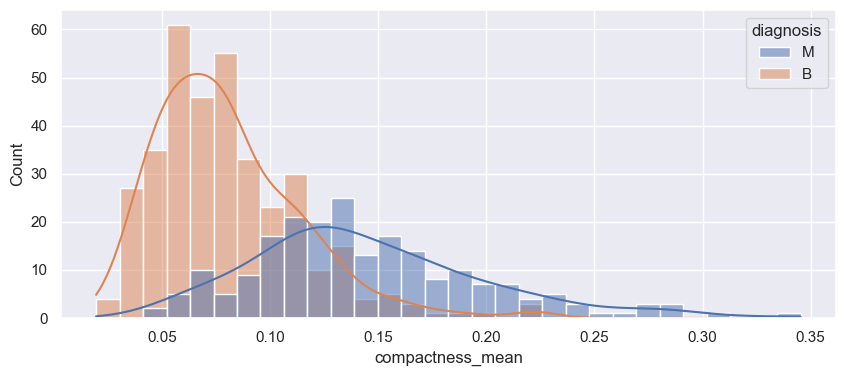

In [11]:
# Creates a figure with a size of 10x6 inches
plt.figure(figsize=(10, 4))

# The histogram will show the distribution of the compactness_mean column
# The compactness_mean column is a numeric column that represents the mean compactness of the cell nuclei
# The bins parameter is used to specify the number of bins in the histogram
# The kde parameter is used to specify whether to plot the kernel density estimate
# The stat parameter is used to specify the type of statistic to plot
# The common_norm parameter is used to specify whether to normalize the histogram
# The hue parameter is used to specify the column to use for color coding the histogram
sns.histplot(
    data=df,
    x="compactness_mean",
    bins=30,
    kde=True,
    #stat="density",
    common_norm=False,
    hue="diagnosis",    
)

# Create a histogram of the compactness_mean column
plt.show()


<Axes: xlabel='area_mean', ylabel='diagnosis'>

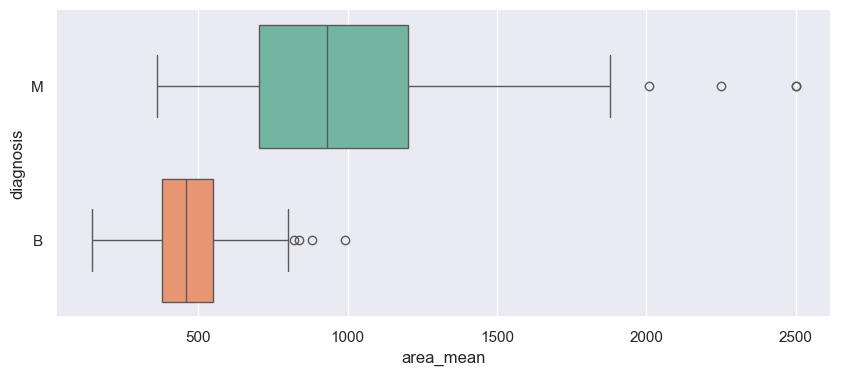

In [12]:
# Creates a figure with a size of 10x6 inches
plt.figure(figsize=(10, 4))

# The histogram will show the distribution of the area_mean column
# The area_mean column is a numeric column that represents the mean area of the cell nuclei
# The palette parameter is used to specify the color palette to use for the histogram
sns.boxplot(
    data=df,
    x="area_mean",
    # The y parameter is used to specify the column to use for the y-axis
    y="diagnosis",
    # The palette parameter is used to specify the color palette to use for the boxplot
    palette="Set2",
)

<Axes: xlabel='area_mean', ylabel='diagnosis'>

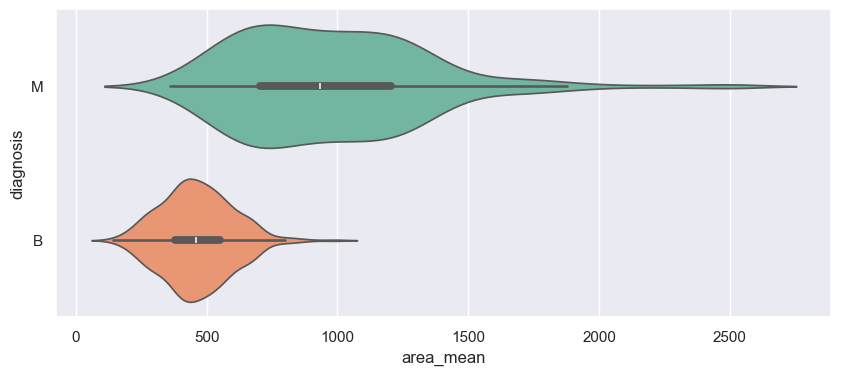

In [13]:
# Creates a figure with a size of 10x6 inches
plt.figure(figsize=(10, 4))

# The violinplot will show the distribution of the area_mean column# 
sns.violinplot(
    data=df,
    x="area_mean",
    # The y parameter is used to specify the column to use for the y-axis
    y="diagnosis",
    # The palette parameter is used to specify the color palette to use for the boxplot
    palette="Set2",
)

## Working with Numerical Columns

In [14]:
# Select the numeric columns only
# The select_dtypes method is used to select columns by data type
# The include parameter is used to specify the data types to include
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Display the numeric columns
num_cols


['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

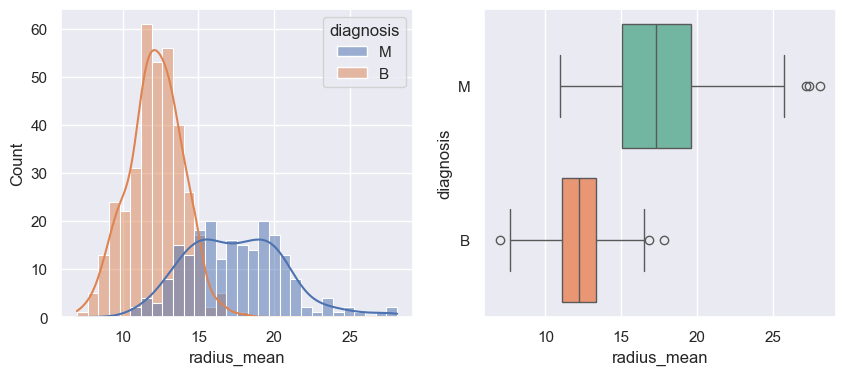

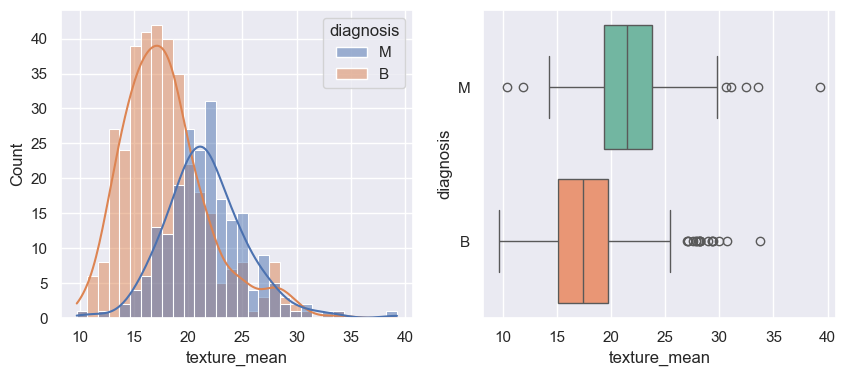

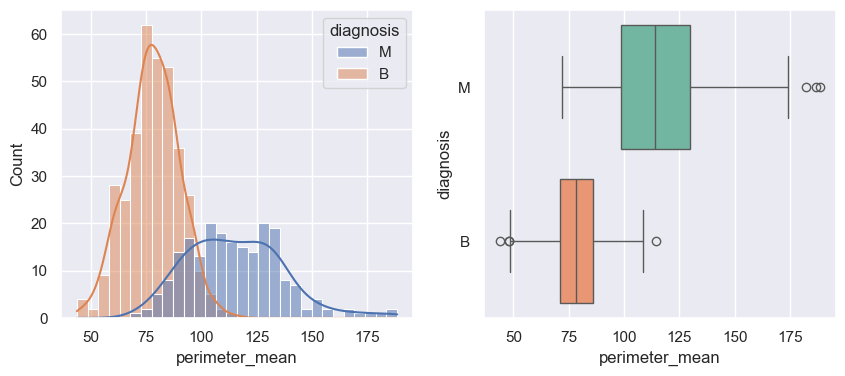

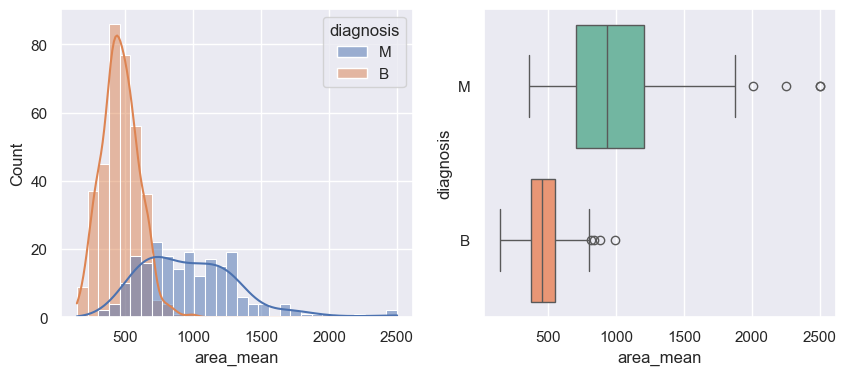

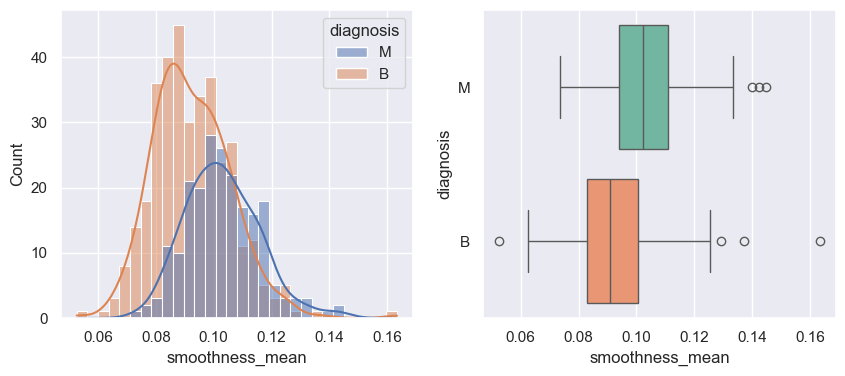

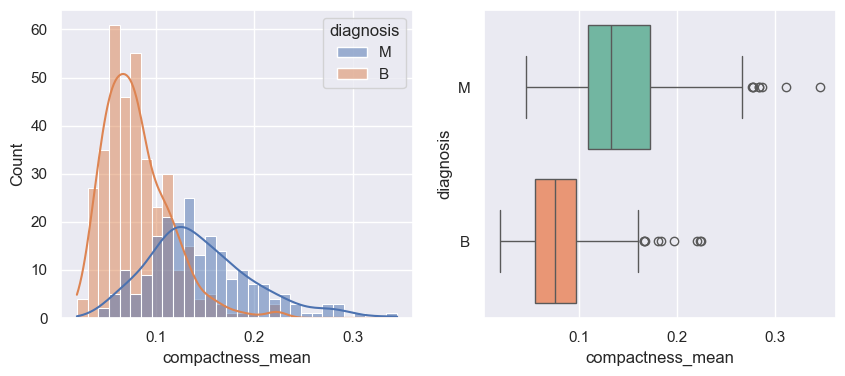

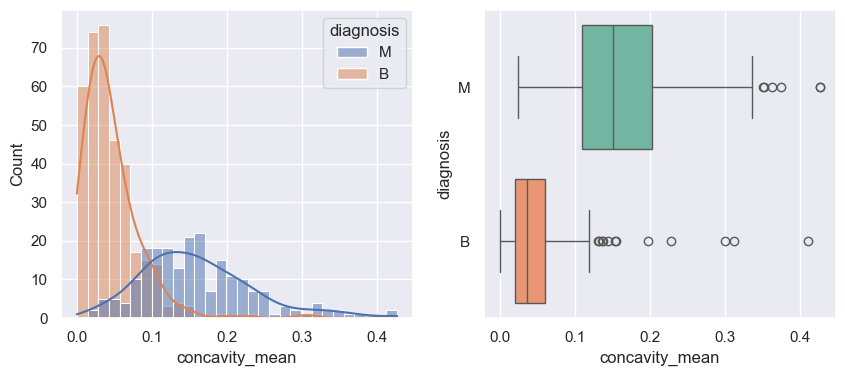

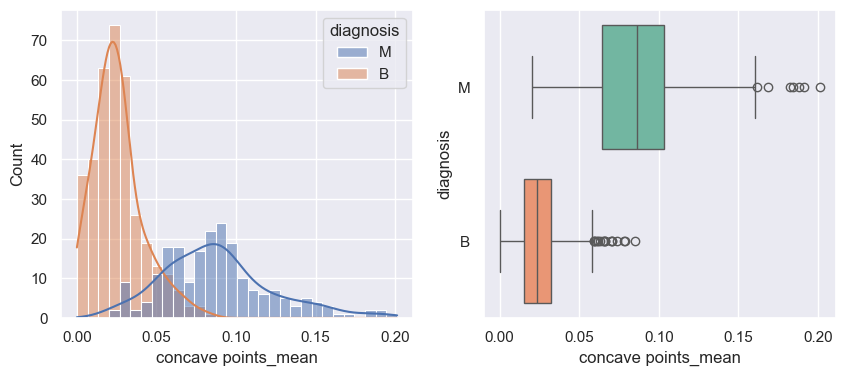

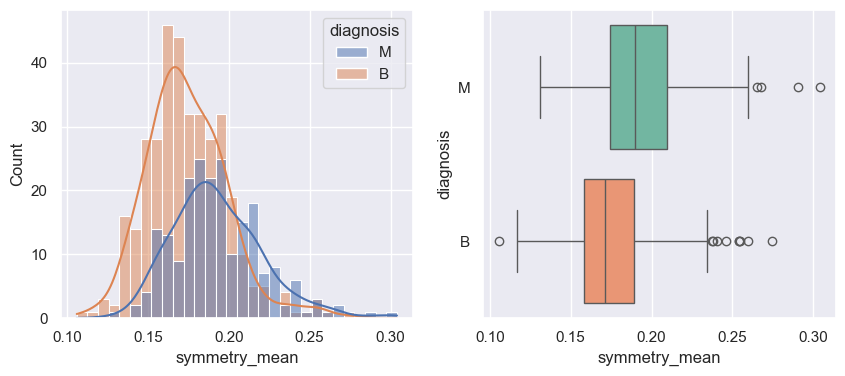

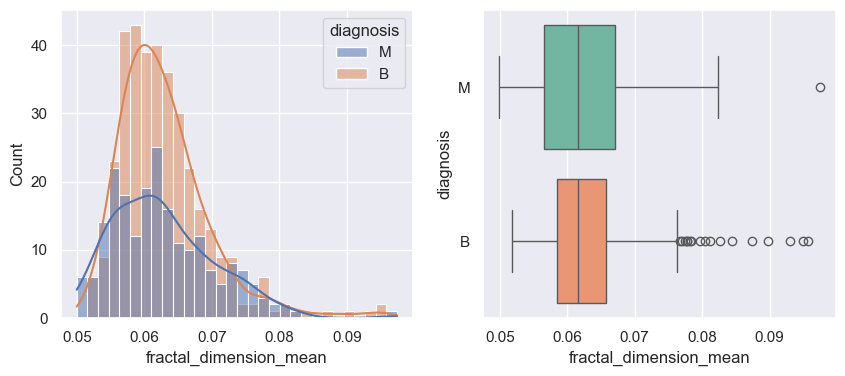

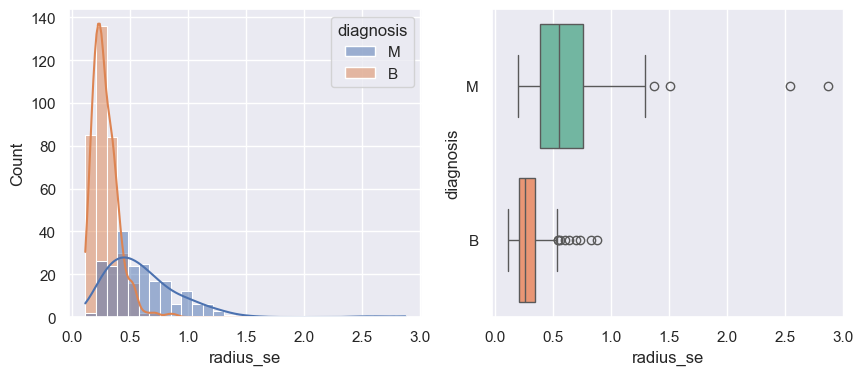

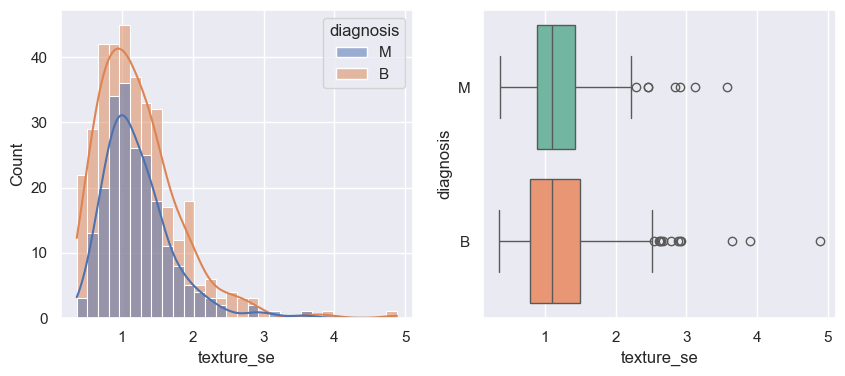

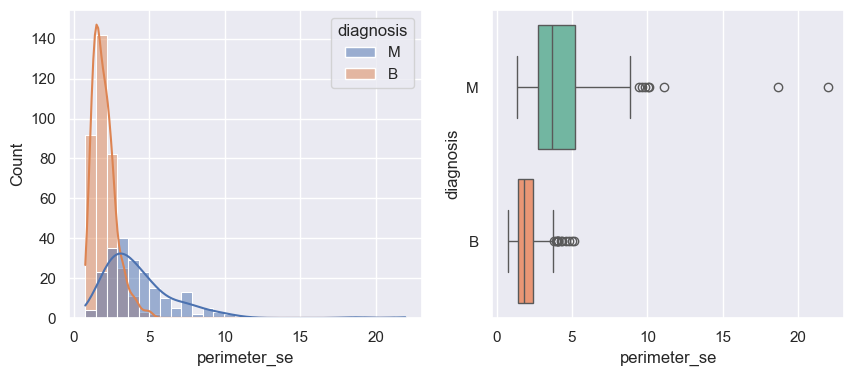

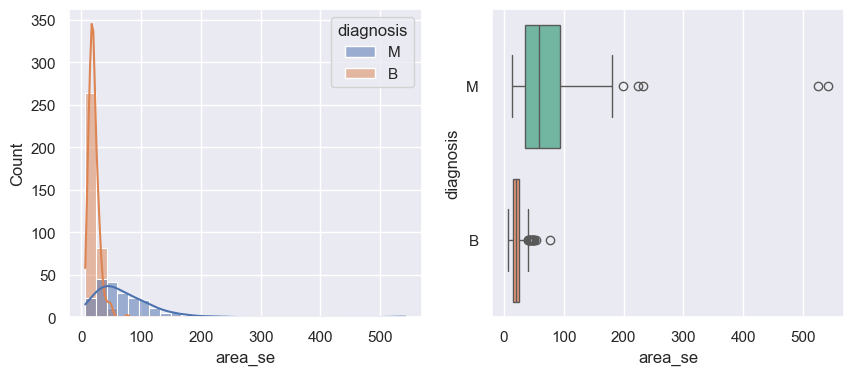

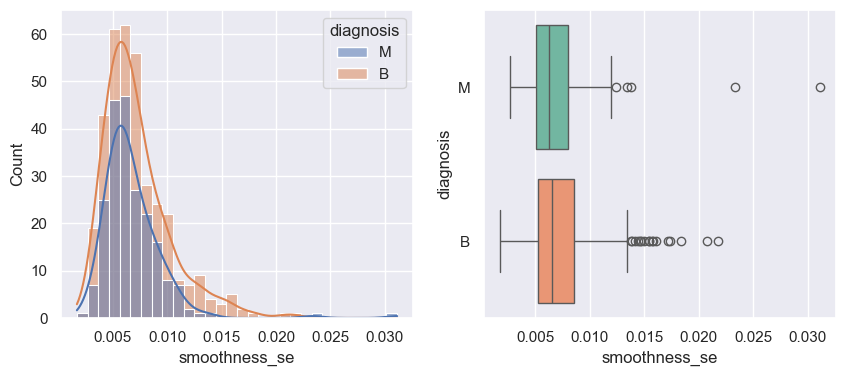

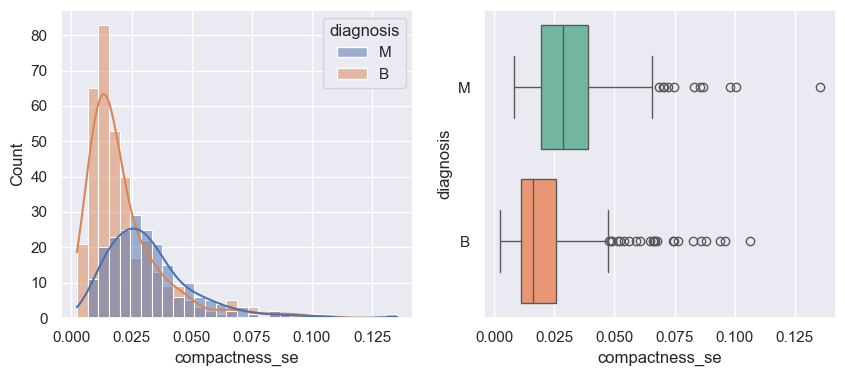

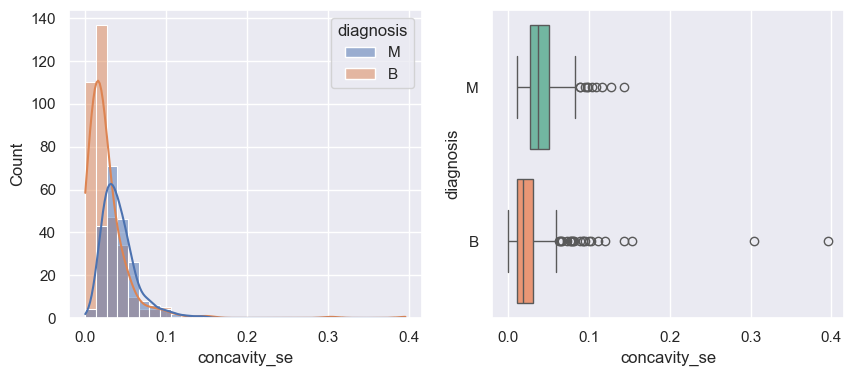

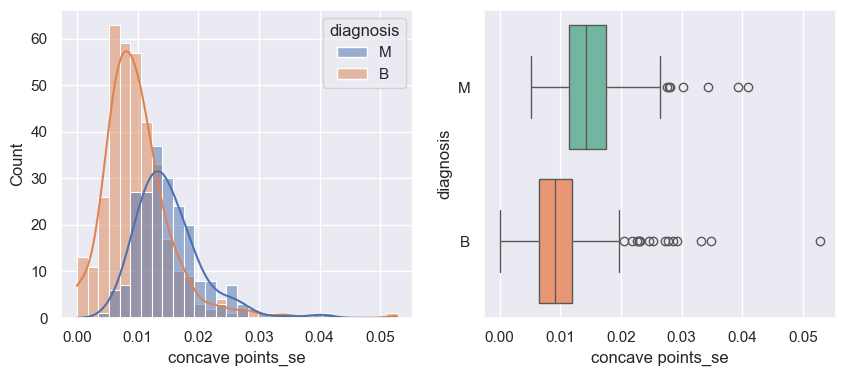

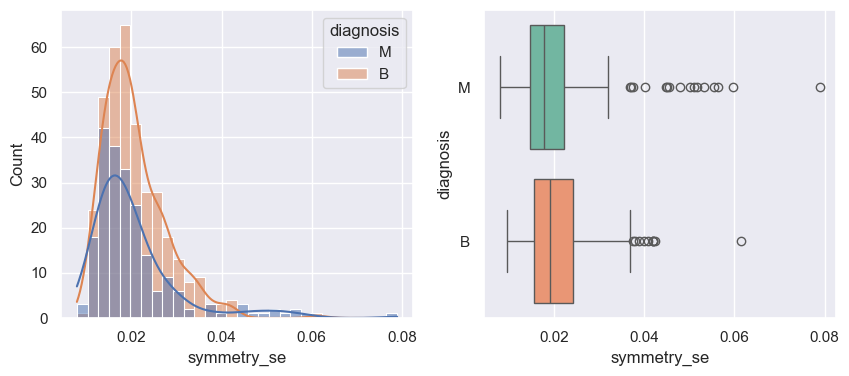

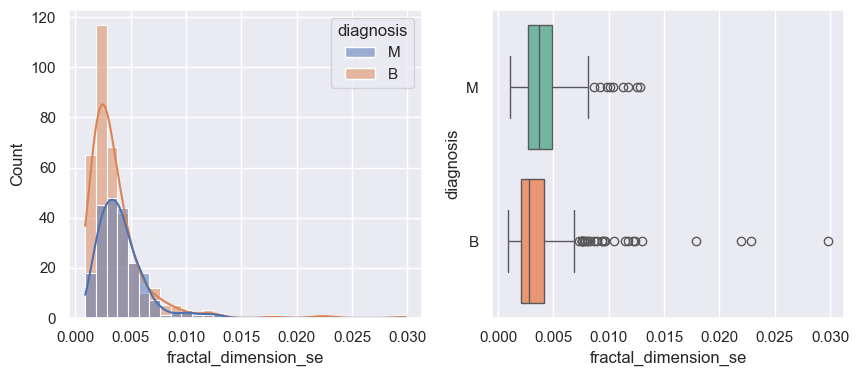

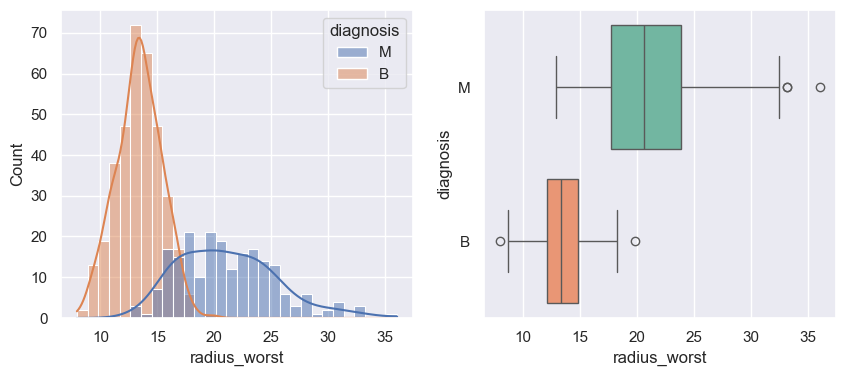

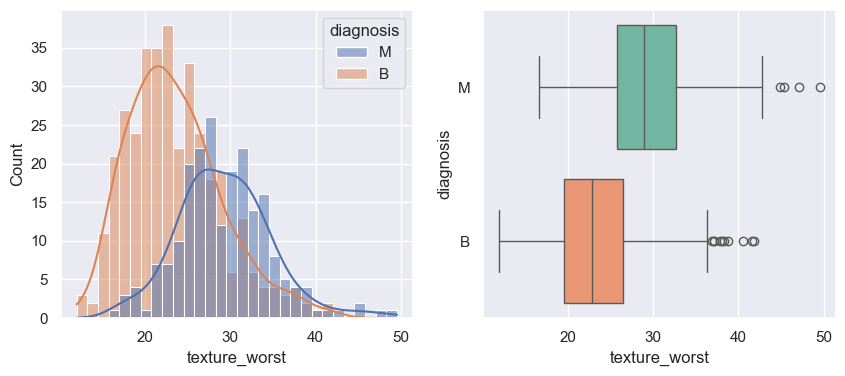

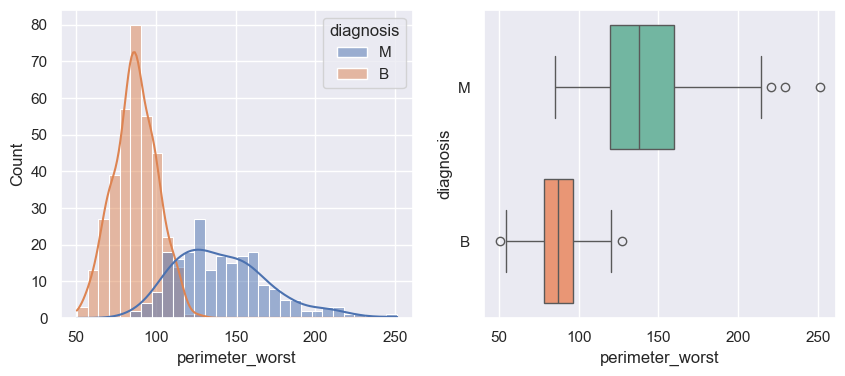

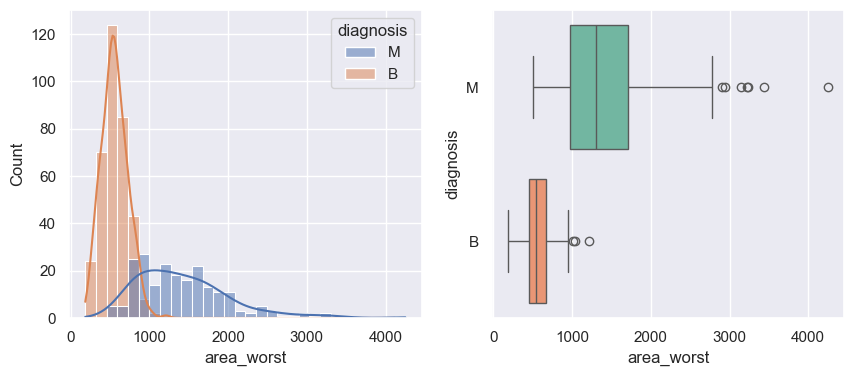

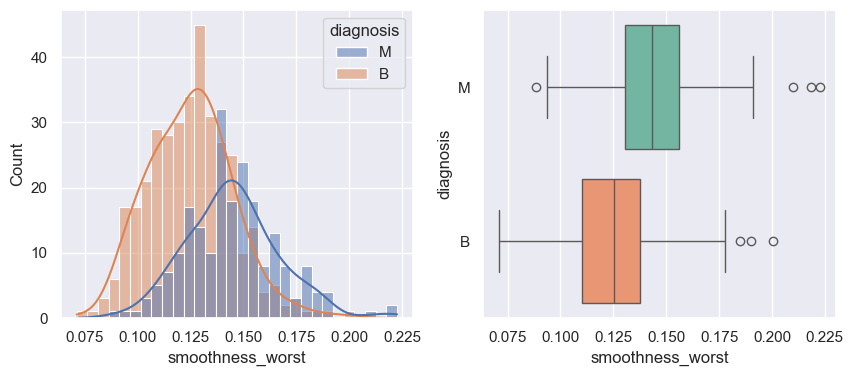

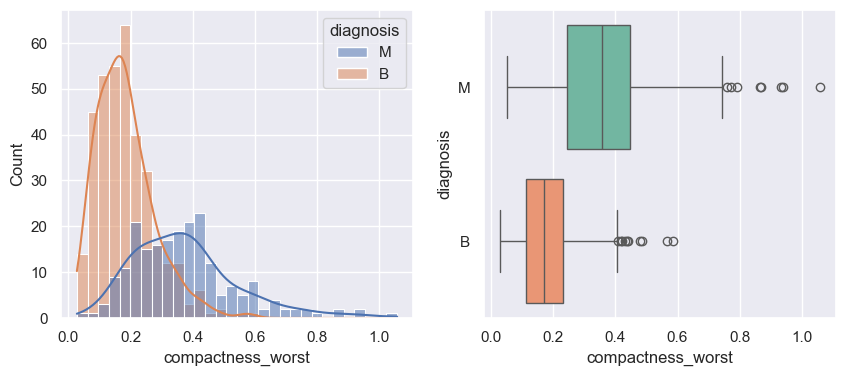

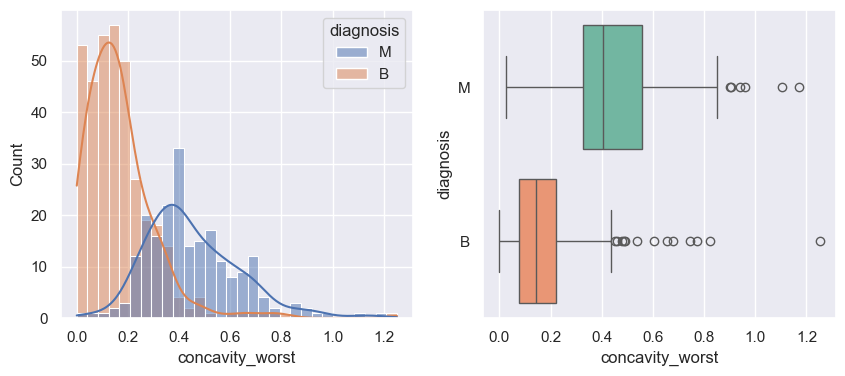

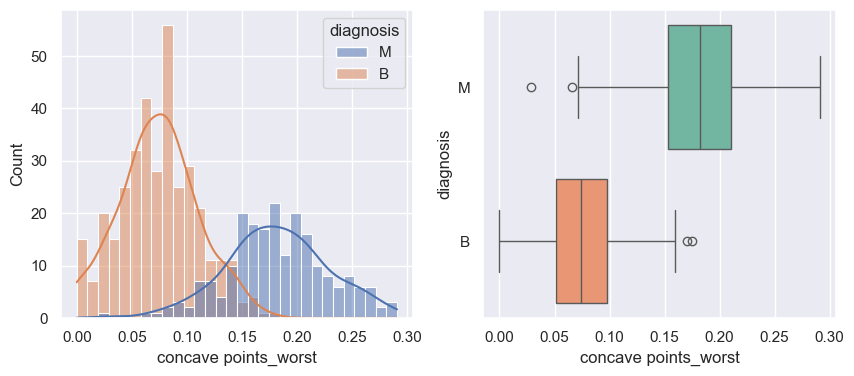

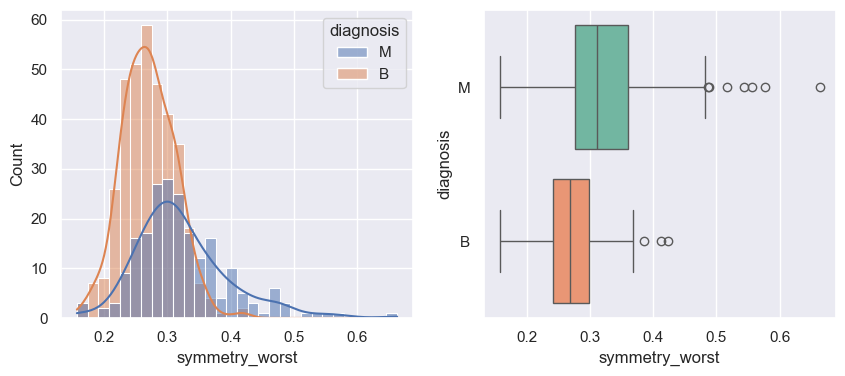

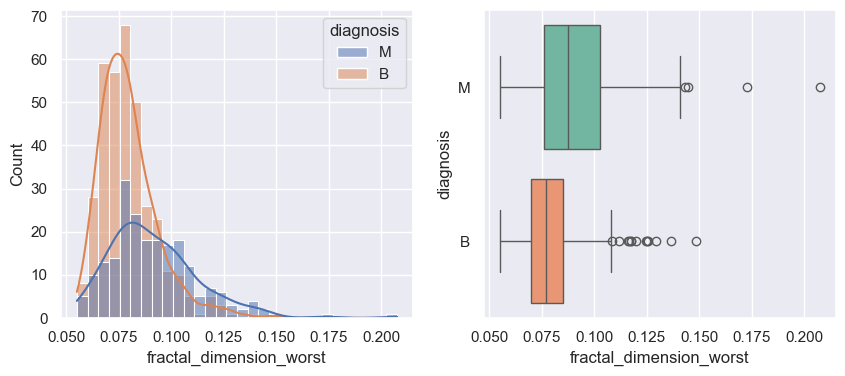

In [15]:
# Data Visualization
# The histplot method is used to create a histogram
# The boxplot method is used to create a boxplot

for feature in num_cols:
    plt.figure(figsize=(10, 4))
    # The subplot method is used to create a subplot. The first subplot will show the histogram.
    plt.subplot(1, 2, 1)
    sns.histplot(
        data=df,
        x=feature,
        bins=30,
        kde=True,
        #stat="density",
        common_norm=False,
        hue="diagnosis",
    )
    # The second subplot will show the boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(
        data=df,
        x=feature,
        y="diagnosis",
        palette="Set2",
    )
    plt.show()

## Summary of Exploratory Data Analysis (EDA)

### Data Overview:
- The dataset contains **569 rows** and **31 columns**.
- After removing unnecessary columns (`Unnamed: 32`, `id`) and duplicates, the dataset is clean and ready for analysis.

### Data Types:
- **Numeric Columns (30)**: Includes features such as `radius_mean`, `texture_mean`, `area_mean`, `compactness_mean`, and others.
- **Categorical Column (1)**: `diagnosis` (Malignant 'M' or Benign 'B').

### Diagnosis Distribution:
- The dataset contains two classes for diagnosis:
    - Malignant (M)
    - Benign (B)

### Correlation Analysis:
- A correlation matrix was computed to identify relationships between numeric features.

### Visualizations:
- Histograms, boxplots, and violin plots were generated to visualize distributions and identify differences between malignant and benign cases.
- Features such as `compactness_mean` and `area_mean` showed distinct distributions between the two diagnosis categories.

Overall, the exploratory analysis indicates clear differences in feature distributions between malignant and benign cases, suggesting these features could be useful for classification modeling.

## Summary of Findings from Exploratory Data Analysis (EDA) Visualizations

The exploratory visualizations (histograms, boxplots, and violin plots) revealed distinct distribution patterns between malignant (M) and benign (B) cases for several key variables:

### Notable Variables:

- **radius_mean, perimeter_mean, area_mean**:
    - Malignant cases generally exhibit higher values compared to benign cases.
    - Clear separation between the two diagnosis categories, suggesting strong predictive potential.

- **compactness_mean, concavity_mean, concave points_mean**:
    - Malignant cases show higher values and wider distributions.
    - Distinct separation, indicating these features are likely important for classification.

- **texture_mean, smoothness_mean, symmetry_mean, fractal_dimension_mean**:
    - Moderate differences between malignant and benign cases.
    - Overlapping distributions, but still potentially useful for modeling.

- **Standard Error (SE) features (e.g., radius_se, texture_se, perimeter_se, area_se)**:
    - Malignant cases tend to have higher variability and larger standard errors.
    - Differences are noticeable but less pronounced compared to mean features.

- **Worst-case features (e.g., radius_worst, perimeter_worst, area_worst)**:
    - Strong separation between malignant and benign cases.
    - Malignant cases consistently show higher worst-case values.

### General Observations:

- Malignant tumors consistently exhibit higher values across most numeric features, particularly in size-related metrics (radius, perimeter, area) and shape-related metrics (compactness, concavity).
- Benign tumors typically have lower values and narrower distributions.
- Features such as `compactness_mean`, `concave points_mean`, and `area_mean` show particularly clear distinctions, making them strong candidates for predictive modeling.

Overall, the visualizations confirm that many numeric features in the dataset have clear and meaningful differences between malignant and benign cases, supporting their use in classification modeling.

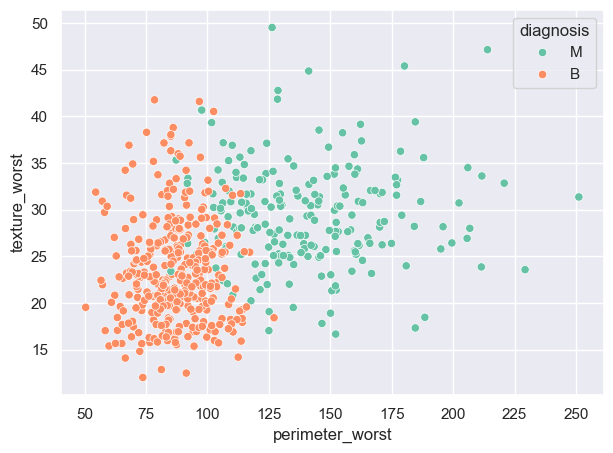

In [16]:
plt.figure(figsize=(7, 5))

# The scatterplot will show the relationship between the perimeter_worst and texture_worst columns
# The perimeter_worst column is a numeric column that represents the worst perimeter of the cell nuclei
# The texture_worst column is a numeric column that represents the worst texture of the cell nuclei
# The hue parameter is used to specify the column to use for color coding the scatterplot
sns.scatterplot(
    data=df,
    x="perimeter_worst",
    y="texture_worst",
    hue="diagnosis",
    palette="Set2",
)
plt.show()

<Figure size 700x500 with 0 Axes>

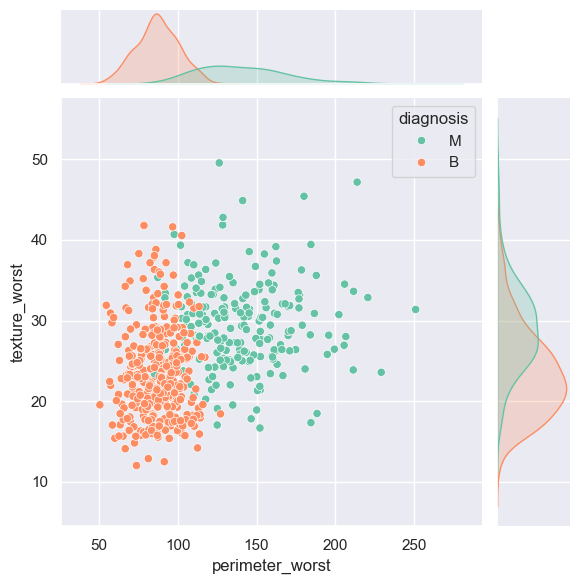

In [17]:
plt.figure(figsize=(7, 5))

# The jointplot will show the relationship between the perimeter_worst and texture_worst columns
# The jointplot method is used to create a scatterplot with marginal histograms
sns.jointplot(
    data=df,
    x="perimeter_worst",
    y="texture_worst",
    hue="diagnosis",
    palette="Set2",
)
plt.show()

## Working with Categorical Columns

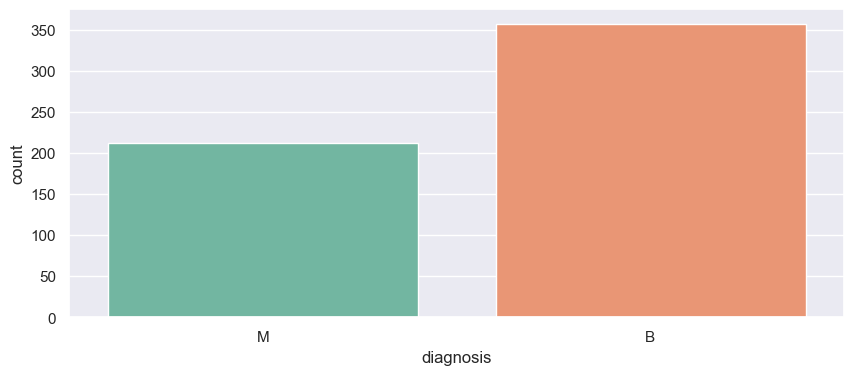

In [18]:
plt.figure(figsize=(10, 4))
sns.countplot(
    data=df,
    x="diagnosis",    
    palette="Set2",
)
plt.show()

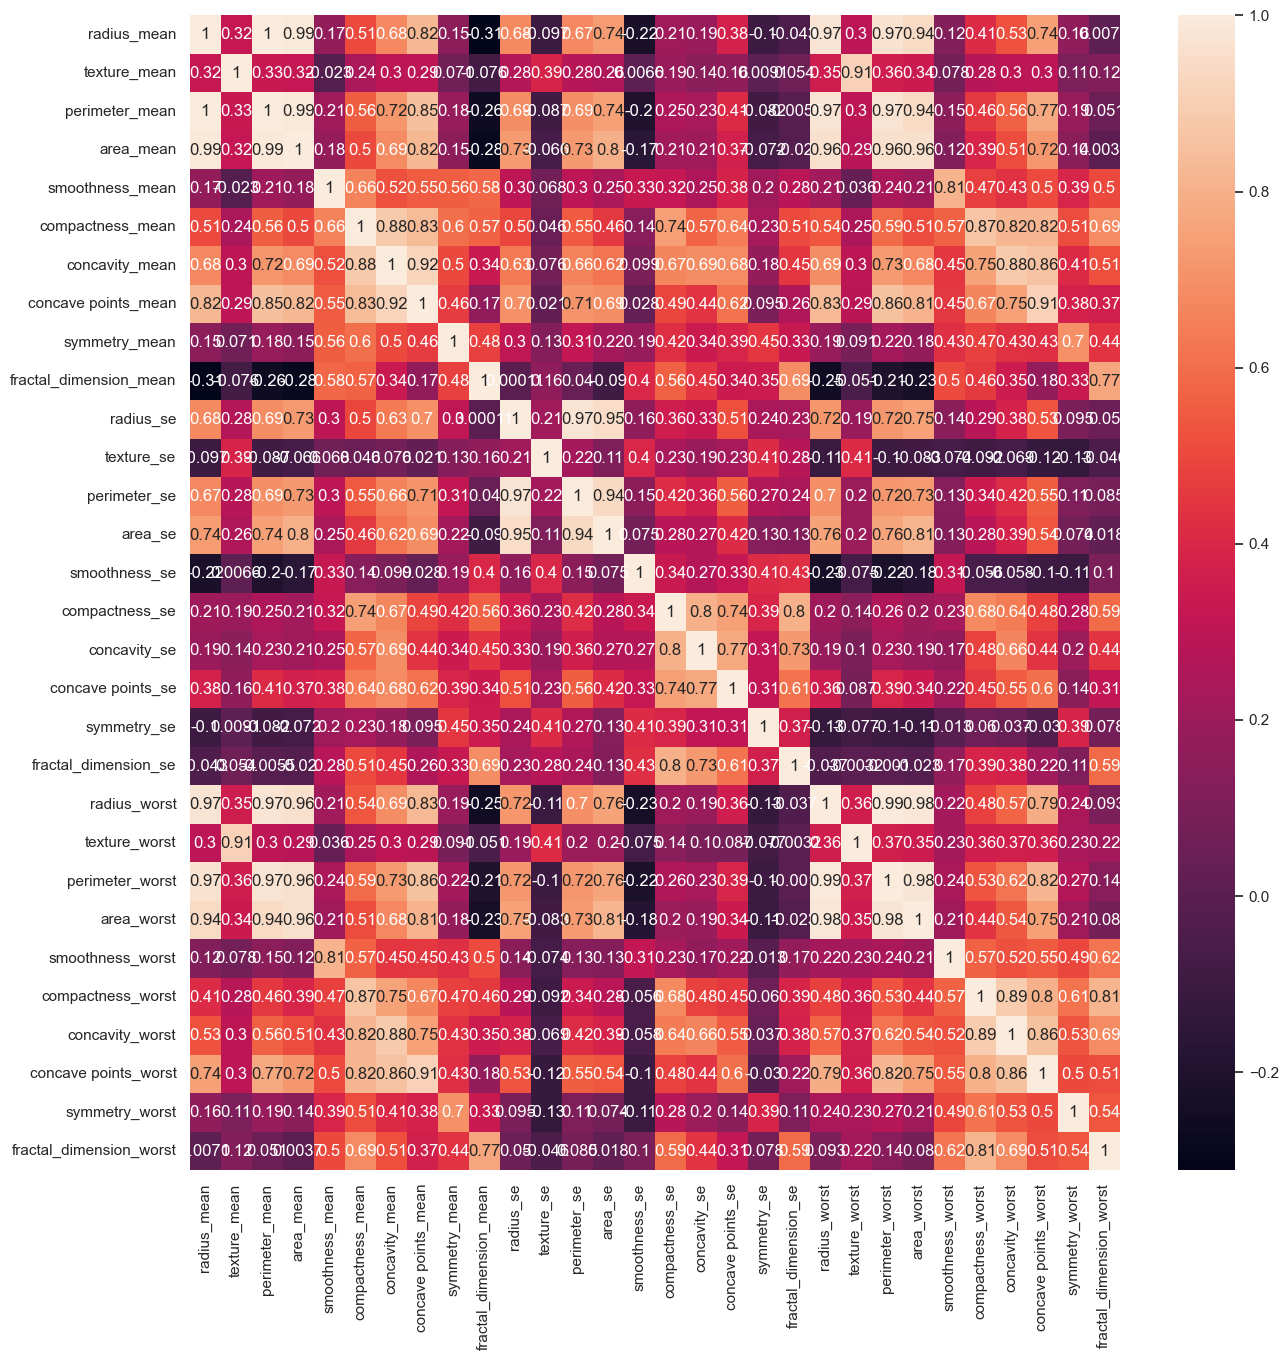

In [19]:
plt.figure(figsize=(15, 15))

# The heatmap will show the correlation matrix
# the df.corr(numeric_only=True) method is used to calculate the correlation matrix
# The annot parameter is used to specify whether to annotate the heatmap with the correlation coefficients
sns.heatmap(df.corr(numeric_only=True), annot=True)

plt.show()

## Interpretation and Summary of Correlation Heatmap

The correlation heatmap provides insights into the relationships between numeric features in the dataset. Key observations include:

### Highly Correlated Features:
- **Radius, Perimeter, and Area**: Features such as `radius_mean`, `perimeter_mean`, and `area_mean` exhibit very high positive correlations with each other. This indicates redundancy, as these features measure similar aspects of tumor size.
- **Worst-case Features**: Variables like `radius_worst`, `perimeter_worst`, and `area_worst` also show strong positive correlations, suggesting they capture similar information about the tumor's worst-case dimensions.
- **Concavity and Concave Points**: Features related to concavity (`concavity_mean`, `concave points_mean`, `concavity_worst`, `concave points_worst`) are strongly correlated, indicating they represent similar shape characteristics.

### Moderately Correlated Features:
- **Compactness and Concavity**: Moderate correlations exist between compactness-related features and concavity-related features, indicating related but distinct shape characteristics.

### Weakly Correlated Features:
- **Texture, Smoothness, Symmetry, and Fractal Dimension**: These features generally show weaker correlations with other variables, suggesting they provide unique information about tumor characteristics.

### Implications for Modeling:
- Due to high correlations, dimensionality reduction techniques (e.g., PCA) or feature selection methods may be beneficial to reduce redundancy and improve model performance.
- Features with strong correlations to the diagnosis (malignant or benign) should be prioritized for predictive modeling.

Overall, the correlation analysis highlights groups of highly correlated features, suggesting opportunities for feature reduction and emphasizing the importance of selecting informative, non-redundant features for classification modeling.

## Transformaciones

* [Scikit Learn - Data Preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html)
* [Scikit Learn - StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [21]:
# X is of type Series
X = df['area_mean']
print(X.shape)

# X is of type DataFrame
# The double brackets are used to create a DataFrame with one column
X = df[['area_mean']]
print(X.shape)

# X is of type DataFrame
# The double brackets are used to create a DataFrame with two columns
X = df[['area_mean', 'texture_worst']]
print(X.shape)

(569,)
(569, 1)
(569, 2)


### Transformando 1 Variable

In [22]:
X = df[['area_mean']]

# The StandardScaler class is used to standardize the data
scaler = StandardScaler()

# The fit_transform method is used to fit the scaler to the data and transform the data
scaler.fit(X)

# The transform method is used to transform the data
X_new = scaler.transform(X)

In [23]:
# Compare the original data with the standardized data
X_compare = pd.DataFrame({
	"Original": X["area_mean"].values.flatten(),
	"Standardized": X_new.flatten()
})
X_compare.head()


,Original,Standardized
0,1001.0,0.984375
1,1326.0,1.908708
2,1203.0,1.558884
3,386.1,-0.764464
4,1297.0,1.826229


In [24]:
X = df[['area_mean']]

# The MinMaxScaler class is used to scale the data to a range of [0, 1]
scaler = MinMaxScaler()

# The fit_transform method is used to fit the scaler to the data and transform the data
scaler.fit(X)

# The transform method is used to transform the data
X_new = scaler.transform(X)

In [25]:
print(f'Max: {scaler.data_max_} - Min: {scaler.data_min_}')

Max: [2501.] - Min: [143.5]


In [26]:
# Compare the original data with the standardized data
X_compare = pd.DataFrame({
	"Original": X["area_mean"].values.flatten(),
	"Standardized": X_new.flatten()
})
X_compare.head()

,Original,Standardized
0,1001.0,0.363733
1,1326.0,0.501591
2,1203.0,0.449417
3,386.1,0.102906
4,1297.0,0.489290


In [27]:
# The inverse_transform method is used to transform the data back to the original scale
scaler.inverse_transform(X_new)

array([[1001. ],
       [1326. ],
       [1203. ],
       [ 386.1],
       [1297. ],
       [ 477.1],
       [1040. ],
       [ 577.9],
       [ 519.8],
       [ 475.9],
       [ 797.8],
       [ 781. ],
       [1123. ],
       [ 782.7],
       [ 578.3],
       [ 658.8],
       [ 684.5],
       [ 798.8],
       [1260. ],
       [ 566.3],
       [ 520. ],
       [ 273.9],
       [ 704.4],
       [1404. ],
       [ 904.6],
       [ 912.7],
       [ 644.8],
       [1094. ],
       [ 732.4],
       [ 955.1],
       [1088. ],
       [ 440.6],
       [ 899.3],
       [1162. ],
       [ 807.2],
       [ 869.5],
       [ 633. ],
       [ 523.8],
       [ 698.8],
       [ 559.2],
       [ 563. ],
       [ 371.1],
       [1104. ],
       [ 545.2],
       [ 531.5],
       [1076. ],
       [ 201.9],
       [ 534.6],
       [ 449.3],
       [ 561. ],
       [ 427.9],
       [ 571.8],
       [ 437.6],
       [1033. ],
       [ 712.8],
       [ 409. ],
       [1152. ],
       [ 656.9],
       [ 527.2

### Transformando 2 Variable

In [28]:
X = df[['area_mean', 'texture_worst']]

scaler = MinMaxScaler()
scaler.fit(X)
scaler.transform(X)

array([[0.36373277, 0.14152452],
       [0.50159067, 0.30357143],
       [0.44941676, 0.36007463],
       ...,
       [0.30311771, 0.58901919],
       [0.4757158 , 0.73027719],
       [0.01590668, 0.48907249]], shape=(569, 2))

In [29]:
# The data_max_ and data_min_ attributes are used to get the maximum and minimum values of the data
scaler.data_min_

array([143.5 ,  12.02])

In [30]:
# Otras opciones para hacer el FIT y TRANSFORM
X_newt = scaler.fit_transform(X)
X_newt2 = scaler.fit(X).transform(X)
X_newt3 = scaler.fit_transform(X)
X_newt4 = MinMaxScaler().fit(X).transform(X)


In [31]:
X_newt_Compare = pd.DataFrame({
    "X_newt": X_newt4.flatten(),
    "X_newt2": X_newt2.flatten(),
    "X_newt3": X_newt3.flatten(),
    "X_newt4": X_newt4.flatten(),
})
X_newt_Compare.head()

,X_newt,X_newt2,X_newt3,X_newt4
0,0.363733,0.363733,0.363733,0.363733
1,0.141525,0.141525,0.141525,0.141525
2,0.501591,0.501591,0.501591,0.501591
3,0.303571,0.303571,0.303571,0.303571
4,0.449417,0.449417,0.449417,0.449417


## Feature Selection - Seleccion de Variables

* [Scikit Learn - Feature Selection](https://scikit-learn.org/stable/modules/feature_selection.html)

### CHI2

* [Scikit-learn - chi2](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html)
* [Scikit-learn - SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html)

Compute chi-squared stats between each non-negative feature and class. This score can be used to select the n_features features with the highest values for the test chi-squared statistic from X, which must contain only non-negative integer feature values such as booleans or frequencies (e.g., term counts in document classification), relative to the classes. If some of your features are continuous, you need to bin them, for example by using KBinsDiscretizer. Recall that the chi-square test measures dependence between stochastic variables, so using this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification.

In [32]:
from sklearn.feature_selection import SelectKBest, chi2

In [33]:
# Crear variables X e y
# X is the feature matrix and y is the target vector
X = df[num_cols]
y = df["diagnosis"]
X.shape

(569, 30)

In [34]:
# The SelectKBest class is used to select the k best features from the data
# The chi2 function is used to calculate the chi-squared statistic
selector = SelectKBest(chi2, k=10)

# The fit method is used to fit the selector to the data
selector.fit(X, y)

SelectKBest(score_func=<function chi2 at 0x000001EA8A4B8A40>)

In [35]:
# The get_feature_names_out method is used to get the names of the selected features
selector.get_feature_names_out()

array(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'perimeter_se', 'area_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst'], dtype=object)

In [36]:
# The following line will return the names of the selected features and their scores
# The zip function is used to combine the names and scores into a list of tuples
# The scores_ attribute is used to get the scores of the selected features

list(zip(selector.get_feature_names_out(), selector.scores_))

[('radius_mean', np.float64(266.1049171951787)),
 ('texture_mean', np.float64(93.89750809863344)),
 ('perimeter_mean', np.float64(2011.1028637679099)),
 ('area_mean', np.float64(53991.655923750935)),
 ('perimeter_se', np.float64(0.14989926383938235)),
 ('area_se', np.float64(5.403075490732696)),
 ('radius_worst', np.float64(19.71235355279163)),
 ('texture_worst', np.float64(10.544035428542989)),
 ('perimeter_worst', np.float64(0.25737977480878715)),
 ('area_worst', np.float64(7.430655358548808e-05))]

In [37]:
# The pvalues_ attribute is used to get the p-values of the selected features
# The p-values are used to test the null hypothesis that the feature is not related to the target variable
# The lower the p-value, the more significant the feature is
pd.DataFrame(
    list(zip(num_cols, selector.pvalues_)),
    columns=["Feature", "p-value"],
).sort_values(by="p-value", ascending=True)


,Feature,p-value
3,area_mean,0.000000e+00
2,perimeter_mean,0.000000e+00
13,area_se,0.000000e+00
22,perimeter_worst,0.000000e+00
23,area_worst,0.000000e+00
20,radius_worst,6.113248e-109
0,radius_mean,8.013976e-60
12,perimeter_se,1.948775e-56
21,texture_worst,7.896683e-40
1,texture_mean,3.322922e-22


In [38]:
# The pvalues_ attribute is used to get the p-values of the selected features
# The p-values are used to test the null hypothesis that the feature is not related to the target variable
# The higher the p-value, the less significant the feature is
pd.DataFrame(
    list(zip(num_cols, selector.pvalues_)),
    columns=["Feature", "p-value"],
).sort_values(by="p-value", ascending=False)

,Feature,p-value
9,fractal_dimension_mean,9.931222e-01
18,symmetry_se,9.928474e-01
14,smoothness_se,9.544251e-01
19,fractal_dimension_se,9.363798e-01
11,texture_se,9.211682e-01
4,smoothness_mean,6.986316e-01
29,fractal_dimension_worst,6.303973e-01
8,symmetry_mean,6.119260e-01
17,concave points_se,5.806211e-01
24,smoothness_worst,5.284529e-01


In [39]:
# The selector.transform method is used to transform the data
# The transformed data will only contain the selected features
X_new = selector.transform(X)
X_new.shape

(569, 10)

### PCA - Principal component analysis 

* [Scikit-learn - PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

PCA is an unsupervised learning technique used to transform high-dimensional data into a lower-dimensional representation while preserving the most important information. It helps simplify complex datasets, making them easier to visualize and analyze.

How does it work?
* Standardization: Since features may have different scales, PCA starts by normalizing the data.
* Covariance Matrix Computation: It calculates how features are related to each other.
* Eigenvectors & Eigenvalues: The principal components are derived from the eigenvectors of the covariance matrix.
* Choosing Principal Components: The components with the highest eigenvalues capture the most variance.
* Transformation: The data is projected onto these principal components, reducing dimensionality.

In [40]:
from sklearn.decomposition import PCA

In [41]:
# The PCA class is used to perform principal component analysis
# The n_components parameter is used to specify the number of components to keep
pca = PCA(n_components=2)

# The fit method is used to fit the PCA model to the data
# The fit method will calculate the principal components of the data
pca.fit(X)

PCA(n_components=2)

In [42]:
# The components_ attribute is a matrix where each row is a principal component
print(pca.components_)
# The explained_variance_ratio_ attribute is used to get the explained variance ratio of each component
print(pca.explained_variance_ratio_)

[[ 5.08623202e-03  2.19657026e-03  3.50763298e-02  5.16826469e-01
   4.23694535e-06  4.05260047e-05  8.19399539e-05  4.77807775e-05
   7.07804332e-06 -2.62155251e-06  3.13742507e-04 -6.50984008e-05
   2.23634150e-03  5.57271669e-02 -8.05646029e-07  5.51918197e-06
   8.87094462e-06  3.27915009e-06 -1.24101836e-06 -8.54530832e-08
   7.15473257e-03  3.06736622e-03  4.94576447e-02  8.52063392e-01
   6.42005481e-06  1.01275937e-04  1.68928625e-04  7.36658178e-05
   1.78986262e-05  1.61356159e-06]
 [ 9.28705650e-03 -2.88160658e-03  6.27480827e-02  8.51823720e-01
  -1.48194356e-05 -2.68862249e-06  7.51419574e-05  4.63501038e-05
  -2.52430431e-05 -1.61197148e-05 -5.38692831e-05  3.48370414e-04
   8.19640791e-04  7.51112451e-03  1.49438131e-06  1.27357957e-05
   2.86921009e-05  9.36007477e-06  1.22647432e-05  2.89683790e-07
  -5.68673345e-04 -1.32152605e-02 -1.85961117e-04 -5.19742358e-01
  -7.68565692e-05 -2.56104144e-04 -1.75471479e-04 -3.05051743e-05
  -1.57042845e-04 -5.53071662e-05]]
[0.98

In [43]:
# # The following line will return the explained variance ratio of each component
# # The explained variance ratio is the proportion of the variance in the data that is explained by each component
# pd.DataFrame(zip(range(1, 31), pca.explained_variance_ratio_))

In [44]:
# # The following line will return the explained variance ratio of each component
# # The explained variance ratio is the proportion of the variance in the data that is explained by each component
# pd.DataFrame(zip(["pc_"+str(i+1) for i in range(0, 30)], pca.explained_variance_ratio_))

In [45]:
X_new = pca.transform(X)
X_new.shape

(569, 2)

## Ejercicio

Modelo con Logistic Regression (LR), MinMaxScaler, chi2(10)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [47]:
# Crear modelo de forma manual
seed = 99

# The LogisticRegression class is used to create a logistic regression model
alg = LogisticRegression(random_state=seed)
# The MinMaxScaler class is used to scale the features to a range between 0 and 1
scaler = MinMaxScaler()
# The SelectKBest class is used to select the top k features based on a scoring function
selector = SelectKBest(score_func=chi2, k=10)

# The make_pipeline function is used to create a pipeline of transformations and the model
# The pipeline will first scale the features, then select the top k features, and finally fit the model
model = make_pipeline(scaler, selector, alg)

# The fit method is used to fit the model to the data
model.fit(X, y)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('selectkbest',
                 SelectKBest(score_func=<function chi2 at 0x000001EA8A4B8A40>)),
                ('logisticregression', LogisticRegression(random_state=99))])

In [48]:
# The score method is used to evaluate the model on the data
# The score method will return the accuracy of the model on the data
acc = model.score(X, y)
print(f"Accuracy: {acc:.3f}")

Accuracy: 0.944


In [49]:
# The predict method is used to make predictions on the data
model.predict(X)

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'M',
       'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M',
       'B', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

In [50]:
# Crear modelo de forma automatica

seed = 99

for i in range(1, 31):
    # The LogisticRegression class is used to create a logistic regression model
    alg = LogisticRegression(random_state=seed)
    # The MinMaxScaler class is used to scale the features to a range between 0 and 1
    scaler = MinMaxScaler()
    # The SelectKBest class is used to select the top k features based on a scoring function
    # The k parameter is used to specify the number of features to select
    # The k parameter is set to the current value of i
    selector = SelectKBest(score_func=chi2, k=i)
    # The make_pipeline function is used to create a pipeline of transformations and the model
    # The pipeline will first scale the features, then select the top k features, and finally fit the model
    model = make_pipeline(scaler, selector, alg)
    # The fit method is used to fit the model to the data
    model.fit(X, y)
    # The score method is used to evaluate the model on the data
    acc = model.score(X, y)
    print(f"Accuracy: {acc:.3f} - #_Features: {i}")

Accuracy: 0.891 - #_Features: 1
Accuracy: 0.921 - #_Features: 2
Accuracy: 0.924 - #_Features: 3
Accuracy: 0.937 - #_Features: 4
Accuracy: 0.942 - #_Features: 5
Accuracy: 0.946 - #_Features: 6
Accuracy: 0.944 - #_Features: 7
Accuracy: 0.946 - #_Features: 8
Accuracy: 0.944 - #_Features: 9
Accuracy: 0.944 - #_Features: 10
Accuracy: 0.942 - #_Features: 11
Accuracy: 0.944 - #_Features: 12
Accuracy: 0.942 - #_Features: 13
Accuracy: 0.942 - #_Features: 14
Accuracy: 0.940 - #_Features: 15
Accuracy: 0.958 - #_Features: 16
Accuracy: 0.963 - #_Features: 17
Accuracy: 0.963 - #_Features: 18
Accuracy: 0.965 - #_Features: 19
Accuracy: 0.967 - #_Features: 20
Accuracy: 0.968 - #_Features: 21
Accuracy: 0.968 - #_Features: 22
Accuracy: 0.968 - #_Features: 23
Accuracy: 0.968 - #_Features: 24
Accuracy: 0.970 - #_Features: 25
Accuracy: 0.972 - #_Features: 26
Accuracy: 0.972 - #_Features: 27
Accuracy: 0.972 - #_Features: 28
Accuracy: 0.972 - #_Features: 29
Accuracy: 0.972 - #_Features: 30


In [51]:
# Crear modelo de forma automatica usando train_test_split y SelectKBest

from sklearn.model_selection import train_test_split

seed = 99

for i in range(1, 31):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=seed
    )
    # The LogisticRegression class is used to create a logistic regression model
    alg = LogisticRegression(random_state=seed)
    # The MinMaxScaler class is used to scale the features to a range between 0 and 1
    scaler = MinMaxScaler()
    # The SelectKBest class is used to select the top k features based on a scoring function
    # The k parameter is used to specify the number of features to select
    # The k parameter is set to the current value of i
    selector = SelectKBest(score_func=chi2, k=i)
    # The make_pipeline function is used to create a pipeline of transformations and the model
    # The pipeline will first scale the features, then select the top k features, and finally fit the model
    model = make_pipeline(scaler, selector, alg)
    # The fit method is used to fit the model to the data
    model.fit(X_train, y_train)
    # The score method is used to evaluate the model on the data
    acc = model.score(X_test, y_test)
    print(f"Accuracy: {acc:.3f} - #_Features: {i}")

Accuracy: 0.886 - #_Features: 1
Accuracy: 0.904 - #_Features: 2
Accuracy: 0.904 - #_Features: 3
Accuracy: 0.921 - #_Features: 4
Accuracy: 0.921 - #_Features: 5
Accuracy: 0.921 - #_Features: 6
Accuracy: 0.921 - #_Features: 7
Accuracy: 0.921 - #_Features: 8
Accuracy: 0.921 - #_Features: 9
Accuracy: 0.921 - #_Features: 10
Accuracy: 0.930 - #_Features: 11
Accuracy: 0.930 - #_Features: 12
Accuracy: 0.930 - #_Features: 13
Accuracy: 0.921 - #_Features: 14
Accuracy: 0.921 - #_Features: 15
Accuracy: 0.930 - #_Features: 16
Accuracy: 0.930 - #_Features: 17
Accuracy: 0.947 - #_Features: 18
Accuracy: 0.956 - #_Features: 19
Accuracy: 0.965 - #_Features: 20
Accuracy: 0.956 - #_Features: 21
Accuracy: 0.956 - #_Features: 22
Accuracy: 0.956 - #_Features: 23
Accuracy: 0.956 - #_Features: 24
Accuracy: 0.956 - #_Features: 25
Accuracy: 0.947 - #_Features: 26
Accuracy: 0.947 - #_Features: 27
Accuracy: 0.947 - #_Features: 28
Accuracy: 0.956 - #_Features: 29
Accuracy: 0.965 - #_Features: 30


In [52]:
# Crear modelo de forma automatica usando train_test_split y PCA

from sklearn.model_selection import train_test_split

seed = 99

for i in range(1, 31):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=seed
    )
    # The LogisticRegression class is used to create a logistic regression model
    alg = LogisticRegression(random_state=seed)
    # The MinMaxScaler class is used to scale the features to a range between 0 and 1
    scaler = MinMaxScaler()
    # The PCA class is used to perform principal component analysis
    # The n_components parameter is used to specify the number of components to keep
    # The n_components parameter is set to the current value of i
    selector = PCA(n_components=i)
    # The make_pipeline function is used to create a pipeline of transformations and the model
    # The pipeline will first scale the features, then select the top k features, and finally fit the model
    model = make_pipeline(scaler, selector, alg)
    # The fit method is used to fit the model to the data
    model.fit(X_train, y_train)
    # The score method is used to evaluate the model on the data
    acc = model.score(X_test, y_test)
    print(f"Accuracy: {acc:.3f} - #_Features: {i}")

Accuracy: 0.904 - #_Features: 1
Accuracy: 0.921 - #_Features: 2
Accuracy: 0.921 - #_Features: 3
Accuracy: 0.956 - #_Features: 4
Accuracy: 0.956 - #_Features: 5
Accuracy: 0.956 - #_Features: 6
Accuracy: 0.956 - #_Features: 7
Accuracy: 0.956 - #_Features: 8
Accuracy: 0.956 - #_Features: 9
Accuracy: 0.965 - #_Features: 10
Accuracy: 0.965 - #_Features: 11
Accuracy: 0.965 - #_Features: 12
Accuracy: 0.965 - #_Features: 13
Accuracy: 0.965 - #_Features: 14
Accuracy: 0.965 - #_Features: 15
Accuracy: 0.965 - #_Features: 16
Accuracy: 0.956 - #_Features: 17
Accuracy: 0.965 - #_Features: 18
Accuracy: 0.965 - #_Features: 19
Accuracy: 0.965 - #_Features: 20
Accuracy: 0.956 - #_Features: 21
Accuracy: 0.965 - #_Features: 22
Accuracy: 0.965 - #_Features: 23
Accuracy: 0.965 - #_Features: 24
Accuracy: 0.965 - #_Features: 25
Accuracy: 0.965 - #_Features: 26
Accuracy: 0.965 - #_Features: 27
Accuracy: 0.965 - #_Features: 28
Accuracy: 0.965 - #_Features: 29
Accuracy: 0.965 - #_Features: 30


## RFE (recursive feature eliminatio)

* [Scikit-learn - RFE](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html)

Feature ranking with recursive feature elimination. Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute or callable. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [53]:
from sklearn.feature_selection import RFE

In [54]:
seed = 99

model = LogisticRegression(random_state=seed)

# The RFE class is used to perform recursive feature elimination
# The n_features_to_select parameter is used to specify the number of features to select
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(X, y)

RFE(estimator=LogisticRegression(random_state=99), n_features_to_select=5)

In [55]:
# The ranking_ attribute is used to get the ranking of the features
# The ranking is a list of integers where the lower the number, the more important the feature is
pd.DataFrame(zip(num_cols, rfe.ranking_), columns=["Feature", "Ranking"]).sort_values(
    by="Ranking", ascending=True
)

,Feature,Ranking
6,concavity_mean,1
26,concavity_worst,1
27,concave points_worst,1
28,symmetry_worst,1
25,compactness_worst,1
24,smoothness_worst,2
0,radius_mean,3
11,texture_se,4
7,concave points_mean,5
5,compactness_mean,6


## Feature Importances

In scikit-learn, feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable. This is especially helpful for understanding model behavior, improving model performance, and reducing overfitting by eliminating irrelevant features.

[scikit-learn - ExtraTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.ExtraTreeClassifier.html)

The purpose of the ExtraTreeClassifier in scikit-learn is to provide a fast, randomized decision tree classifier that can be used either on its own or as part of an ensemble (like ExtraTreesClassifier).

In [56]:
from sklearn.tree import ExtraTreeClassifier

In [57]:
# Create an ExtraTreeClassifier model with a fixed random state for reproducibility
model = ExtraTreeClassifier(random_state=seed)
model.fit(X, y)

ExtraTreeClassifier(random_state=99)

In [58]:
# The feature_importances_ attribute is used to get the importance of each feature
# The higher the value, the more important the feature is
pd.DataFrame(zip(model.feature_importances_, X.columns), columns=["Importance", "Feature"]).sort_values(
    by="Importance", ascending=False
)

,Importance,Feature
27,0.463967,concave points_worst
13,0.100113,area_se
26,0.080266,concavity_worst
0,0.065893,radius_mean
20,0.056212,radius_worst
23,0.032233,area_worst
1,0.025336,texture_mean
3,0.019064,area_mean
5,0.017459,compactness_mean
10,0.016790,radius_se


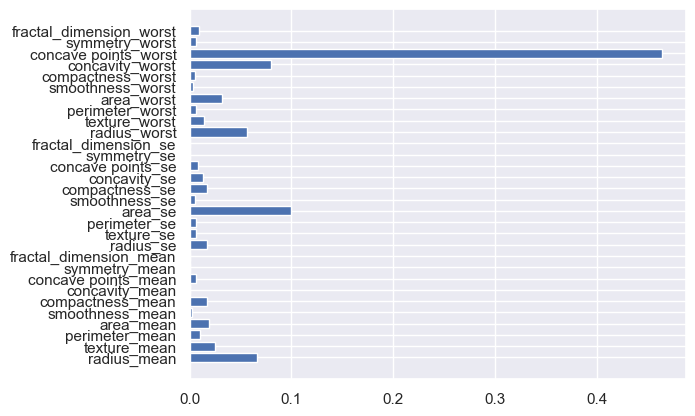

In [59]:
plt.barh(y=num_cols, width=model.feature_importances_)
plt.show()

### Feature Importance with Logistic Regression

In [60]:
# Create a pipeline with MinMaxScaler and LogisticRegression
# Fit the pipeline to the data (X, y)
# Extract the coefficients from the trained LogisticRegression model
model = make_pipeline(MinMaxScaler(), LogisticRegression(random_state=seed))
model.fit(X, y)
model.steps[-1][-1].coef_[0]

array([ 1.89245287,  1.7164987 ,  1.85683898,  1.60897612,  0.64627197,
        0.33322584,  1.43774434,  2.14350113,  0.54801534, -0.98139832,
        1.29174989,  0.03265637,  0.99370891,  0.85501125,  0.06845565,
       -0.6570181 , -0.2720521 ,  0.26522948, -0.23091012, -0.63212283,
        2.43833645,  2.35873461,  2.2277386 ,  1.76845038,  1.57859088,
        0.7790283 ,  1.38070971,  2.72399651,  1.34480224,  0.34473524])

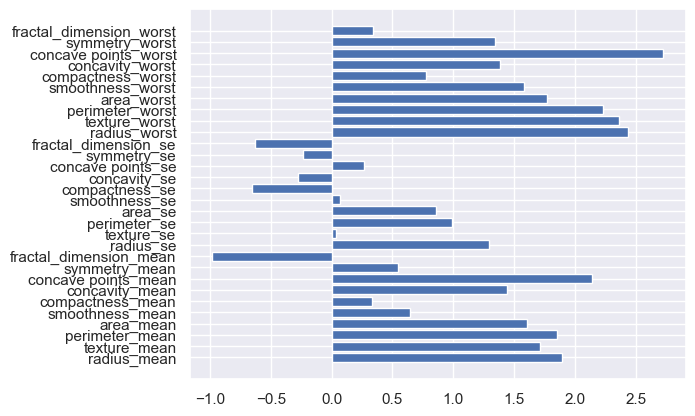

In [61]:
plt.barh(y=num_cols, width=model.steps[-1][-1].coef_[0])
plt.show()

#### Summary and Interpretation of Feature Importance (Logistic Regression)

The previous graphic illustrates the feature importance derived from the Logistic Regression model. Each bar represents the magnitude and direction of the coefficient associated with each feature:

- **Positive coefficients** indicate that higher values of the feature increase the likelihood of a malignant diagnosis (M).
- **Negative coefficients** indicate that higher values of the feature decrease the likelihood of a malignant diagnosis, thus favoring a benign diagnosis (B).
- The magnitude of each coefficient reflects the strength of its influence on the prediction.

#### Key Observations:

- Features with larger absolute coefficient values have a stronger impact on the model's predictions.
- Features such as `concave points_worst`, `perimeter_worst`, and `radius_worst` typically show higher positive coefficients, suggesting they strongly contribute to predicting malignant cases.
- Conversely, features with negative coefficients, if present, indicate characteristics associated with benign cases.

### Implications for Modeling:

- Features with high absolute coefficient values should be prioritized in predictive modeling and further analysis.
- Features with coefficients close to zero have minimal predictive power and may be candidates for removal to simplify the model.

Overall, this visualization helps identify the most influential features in distinguishing between malignant and benign diagnoses, providing valuable insights for feature selection and model interpretation.

## Cross Validation

* [Scikit-learn - Cross validation](https://scikit-learn.org/stable/modules/cross_validation.html)
* [Scikit-learn - Model Selection](https://scikit-learn.org/stable/api/sklearn.model_selection.html)


### K-Fold cross-validaton

* [Scikit-learn - KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)

Provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds (without shuffling by default). Each fold is then used once as a validation while the k - 1 remaining folds form the training set.

* [Scikit-learn - cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

In [62]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict

In [63]:
seed = 99

cv_technique = KFold(n_splits=5, shuffle=True, random_state=seed)
model = LogisticRegression(random_state=seed)

# cross_val_score is a function from scikit-learn that evaluates a model's performance using cross-validation.
# It splits the dataset into multiple folds, trains the model on some folds, and evaluates it on the remaining fold.
# This process is repeated for each fold, and the function returns an array of scores (e.g., accuracy) for each iteration.
results = cross_val_score(model, X, y, cv=cv_technique)
results

array([0.94736842, 0.95614035, 0.95614035, 0.9122807 , 0.94690265])

In [64]:
# The mean and standard deviation of the accuracy scores are printed
# The mean is the average accuracy score across all folds, and the standard deviation indicates the variability of the scores.
print(f"Average accuracy: {results.mean():.3f} \nStandard deviation: {results.std():.3f}")

Average accuracy: 0.944 
Standard deviation: 0.016


In [65]:
# The cross_val_predict function is used to generate cross-validated estimates for each data point.
# It returns the predicted labels for each data point based on the cross-validation process.
# cross_val_predict(
#     model,
#     X,
#     y,
#     cv=cv_technique
# )

#### Ejercicio Cross Validation

In [66]:
# Import the necessary classifiers
# The classifiers are used to create different machine learning models
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from  sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

In [67]:
# Define the models in a list
models = []
models.append(('LR', LogisticRegression(random_state=seed)))
models.append(('DTC', DecisionTreeClassifier(random_state=seed)))
models.append(('GNB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('RFC', RandomForestClassifier(random_state=seed)))
models.append(('SVM', LinearSVC(random_state=seed)))

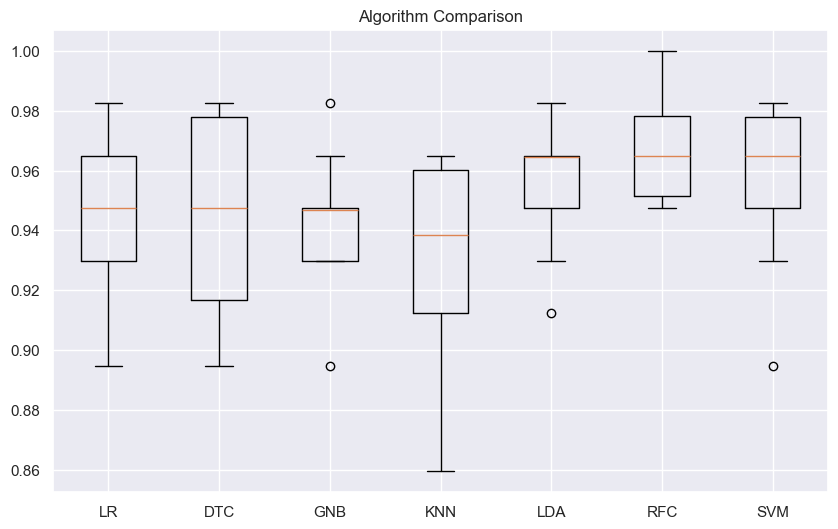

In [68]:
# The for loop iterates over the models and evaluates each model using cross-validation
# Iterate over the list of models, performing 5-fold cross-validation for each model.
# For each model, calculate cross-validation scores using KFold with 5 splits, shuffling enabled, and a fixed random state for reproducibility.
# Append the cross-validation results to the 'results' list and the corresponding model names to the 'names' list.  

seed = 45
results = []
names = []

for name, model in models:
    cv_technique = KFold(n_splits=10, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X, y, cv=cv_technique, scoring='accuracy')
    
    results.append(cv_results)
    names.append(name)

plt.figure(figsize=(10, 6))
plt.boxplot(results, labels=names)
plt.title("Algorithm Comparison")
plt.xticks(range(1, len(names)+1), names)
plt.show()

## Interpretation of Algorithm Comparison Results

The boxplot visualization compares the performance (accuracy) of several classification algorithms using 10-fold cross-validation. Each box represents the distribution of accuracy scores obtained by repeatedly training and evaluating the model on different subsets of the dataset.

### Observations:

- **Logistic Regression (LR)**: Shows consistently high accuracy with low variability, indicating stable and reliable performance.
- **Decision Tree Classifier (DTC)**: Exhibits good accuracy but with higher variability, suggesting potential overfitting or sensitivity to data splits.
- **Gaussian Naive Bayes (GNB)**: Performs reasonably well but has slightly lower accuracy and higher variability compared to LR and RFC.
- **K-Nearest Neighbors (KNN)**: Good accuracy overall, but with noticeable variability, indicating sensitivity to the choice of neighbors and data distribution.
- **Linear Discriminant Analysis (LDA)**: Demonstrates strong and stable performance, similar to Logistic Regression.
- **Random Forest Classifier (RFC)**: Achieves high accuracy with low variability, indicating robust and reliable predictions.
- **Support Vector Machine (SVM)**: Good accuracy but with higher variability, suggesting sensitivity to hyperparameter tuning or data splits.

### Summary:

- **Best Performing Algorithms**: Logistic Regression (LR), Random Forest Classifier (RFC), and Linear Discriminant Analysis (LDA) consistently achieve high accuracy with low variability, making them strong candidates for this classification task.
- **Moderate Performance**: Decision Tree Classifier (DTC), K-Nearest Neighbors (KNN), and Support Vector Machine (SVM) perform well but exhibit higher variability, indicating potential sensitivity to hyperparameters or data splits.
- **Lower Performance**: Gaussian Naive Bayes (GNB) shows slightly lower accuracy and higher variability, suggesting it may not be the optimal choice for this dataset.

Overall, Logistic Regression, Random Forest, and Linear Discriminant Analysis appear to be the most reliable and effective algorithms for this classification problem based on the cross-validation results.

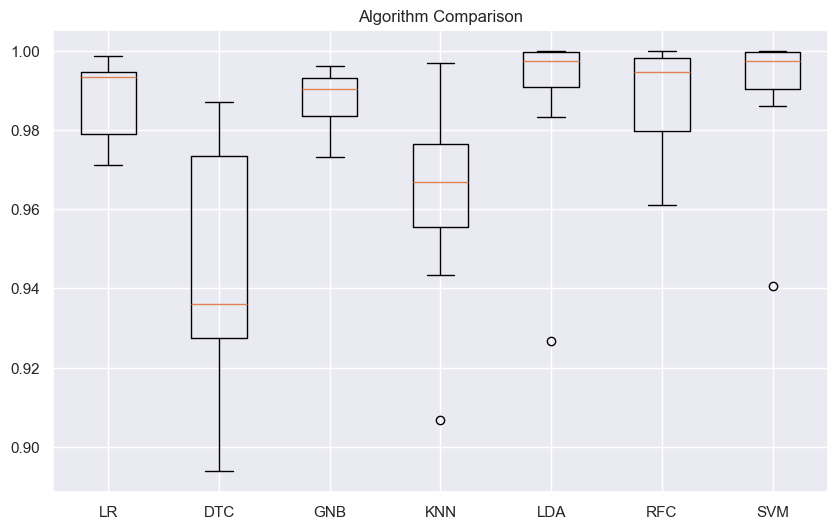

In [69]:
seed = 45
results = []
names = []

for name, model in models:
    cv_technique = KFold(n_splits=10, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X, y, cv=cv_technique, scoring='roc_auc')
    
    results.append(cv_results)
    names.append(name)

plt.figure(figsize=(10, 6))
plt.boxplot(results, labels=names)
plt.title("Algorithm Comparison")
plt.xticks(range(1, len(names)+1), names)
plt.show()

## Interpretation of Algorithm Comparison (ROC-AUC)

The boxplot visualization compares the performance of several classification algorithms using the ROC-AUC metric with 10-fold cross-validation. ROC-AUC measures the model's ability to distinguish between classes, with values closer to 1 indicating better performance.

### Observations:

- **Logistic Regression (LR)**: Exhibits consistently high ROC-AUC scores with minimal variability, indicating strong and stable predictive performance.
- **Decision Tree Classifier (DTC)**: Shows good performance but with higher variability, suggesting sensitivity to data splits and potential overfitting.
- **Gaussian Naive Bayes (GNB)**: Demonstrates strong ROC-AUC scores with relatively low variability, indicating reliable performance.
- **K-Nearest Neighbors (KNN)**: Performs well overall but has noticeable variability, indicating sensitivity to data distribution and parameter tuning.
- **Linear Discriminant Analysis (LDA)**: Achieves consistently high ROC-AUC scores with low variability, similar to Logistic Regression, indicating robust performance.
- **Random Forest Classifier (RFC)**: Shows excellent ROC-AUC scores with very low variability, suggesting strong and stable predictive capability.
- **Support Vector Machine (SVM)**: Performs well but with higher variability, indicating sensitivity to hyperparameter tuning or data splits.

### Summary:

- **Top Performers**: Logistic Regression (LR), Random Forest Classifier (RFC), and Linear Discriminant Analysis (LDA) consistently achieve high ROC-AUC scores with low variability, making them excellent choices for this classification task.
- **Moderate Performers**: Decision Tree Classifier (DTC), K-Nearest Neighbors (KNN), and Support Vector Machine (SVM) show good performance but higher variability, indicating potential sensitivity to hyperparameters or data splits.
- **Gaussian Naive Bayes (GNB)**: Performs strongly and consistently, making it a reliable choice, though slightly behind the top performers.

Overall, based on ROC-AUC scores, Logistic Regression, Random Forest, and Linear Discriminant Analysis are the most effective and reliable algorithms for distinguishing between malignant and benign cases in this dataset.

## Metrics

* [Scikit-learn - model_evaluation](https://scikit-learn.org/stable/modules/model_evaluation.html)
* [Sklearn learn Metrics](https://scikit-learn.org/stable/api/sklearn.metrics.html)
* [Scikit-learn - Plot_confusion_matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
* [Scikit-learn - Confusion Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [70]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [72]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=99
)

model = DecisionTreeClassifier(random_state=99)
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
y_hat

array(['B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M',
       'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M',
       'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B'], dtype=object)

In [73]:
# Create the confusion matrix
# It takes the true labels and the predicted labels as input
# The output is a matrix where the rows represent the true classes and the columns represent the predicted classes
# The diagonal elements represent the number of correct predictions
# The off-diagonal elements represent the number of incorrect predictions
confusion_matrix(y_true=y_test, y_pred=y_hat)

array([[72,  4],
       [ 6, 32]])

In [74]:
# The accuracy_score function is used to calculate the accuracy of the model
accuracy_score(y_true=y_test, y_pred=y_hat)

0.9122807017543859

## Fine Tuning 

* [Scikit learn - Tuning the hyper-parameters of an estimator](https://scikit-learn.org/stable/modules/grid_search.html)
* [Scikit learn - GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [75]:
from sklearn.model_selection import GridSearchCV

### Create model using the whole dataset

In [ ]:
seed = 99

# Initialize the Decision Tree Classifier model
model = DecisionTreeClassifier()

# Define the cross-validation technique with 10 splits
cv_technique = KFold(n_splits=10)

# Define the hyperparameters to tune and their possible values
parametros = {
    "criterion": ["gini", "entropy", "log_loss"],  # Criterion to measure the quality of a split
    "max_depth": [2, 4, 6, 8, 10],                 # Maximum depth of the tree
    "max_features": [3, 6, 15, 25],                # Number of features to consider when looking for the best split
    "random_state": [seed]                         # Random state for reproducibility
}

# Create a GridSearchCV object to perform hyperparameter tuning
grid_model = GridSearchCV(
    estimator=model,           # Model to tune
    param_grid=parametros,     # Hyperparameters to test
    scoring="accuracy",        # Metric to optimize
    cv=cv_technique,           # Cross-validation technique
    #n_jobs=-1,                # Uncomment to use all available CPU cores
    #verbose=1                 # Uncomment for detailed output during fitting
)

# Fit the GridSearchCV object to the data to find the best hyperparameters
grid_model.fit(X, y)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'max_features': [3, 6, 15, 25], 'random_state': [99]},
             scoring='accuracy')

In [ ]:
# The best_estimator_ attribute is used to get the best estimator from the grid search
grid_model.best_estimator_

DecisionTreeClassifier(max_depth=6, max_features=25, random_state=99)

In [ ]:
# The best_params_ attribute is used to get the best hyperparameters found during the grid search
# The best hyperparameters are the ones that resulted in the highest accuracy score
grid_model.best_params_

{'criterion': 'gini', 'max_depth': 6, 'max_features': 25, 'random_state': 99}

In [ ]:
# The best_estimator_.get_params() method returns the hyperparameters of the best estimator
grid_model.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 25,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 99,
 'splitter': 'best'}

In [82]:
# The predict method is used to make predictions on the test data
# The predictions are made using the best estimator found during the grid search
grid_model.predict(X_test)

array(['B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M',
       'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M',
       'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B'], dtype=object)

In [83]:
# The best_score_ attribute is used to get the best score found during the grid search
grid_model.best_score_

np.float64(0.9454887218045112)

### Create a model using Train and Test Datasets

In [84]:
seed = 99

# Split the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Initialize the Decision Tree Classifier model
model = DecisionTreeClassifier()

# Define the cross-validation technique with 10 splits
cv_technique = KFold(n_splits=10)

# Define the hyperparameters to tune and their possible values
parametros = {
    "criterion": ["gini", "entropy", "log_loss"],  # Criterion to measure the quality of a split
    "max_depth": [2, 4, 6, 8, 10],                 # Maximum depth of the tree
    "max_features": [3, 6, 15, 25],                # Number of features to consider when looking for the best split
    "random_state": [seed]                         # Random state for reproducibility
}

# Create a GridSearchCV object to perform hyperparameter tuning
grid_model = GridSearchCV(
    estimator=model,           # Model to tune
    param_grid=parametros,     # Hyperparameters to test
    scoring="accuracy",        # Metric to optimize
    cv=cv_technique,           # Cross-validation technique
    #n_jobs=-1,                # Uncomment to use all available CPU cores
    #verbose=1                 # Uncomment for detailed output during fitting
)

# Fit the GridSearchCV object to the data to find the best hyperparameters
grid_model.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'max_features': [3, 6, 15, 25], 'random_state': [99]},
             scoring='accuracy')

In [87]:
# The best_params_ attribute is used to get the best hyperparameters found during the grid search
# The best hyperparameters are the ones that resulted in the highest accuracy score
grid_model.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 6, 'random_state': 99}

In [85]:
# The best_score_ attribute is used to get the best score found during the grid search
grid_model.best_score_

np.float64(0.9514975845410628)

In [86]:
# The predict method is used to make predictions on the test data
# The predictions are made using the best estimator found during the grid search
y_hat = grid_model.predict(X_test)

# The accuracy_score function is used to calculate the accuracy of the model
accuracy_score(y_true=y_test, y_pred=y_hat)

0.9122807017543859